# Image Processing I

## Template Matching by Correlation

### Convolution vs Correlation
<img src="i/corr1.png" width=800>

### Example
<img src="i/corr2.png" width=800>

### Normalized Correlation
<img src="i/corr3.png" width=800>

## References 
- [Template Matching by Correlation](https://youtu.be/1_hwFc8PXVE)
- [ OpenCV Template Matching Tutorial](https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html)
- [First Principles of Computer Vision Monographs](https://fpcv.cs.columbia.edu/Monographs)


In [1]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
from matplotlib import patches

%matplotlib inline
import files_management

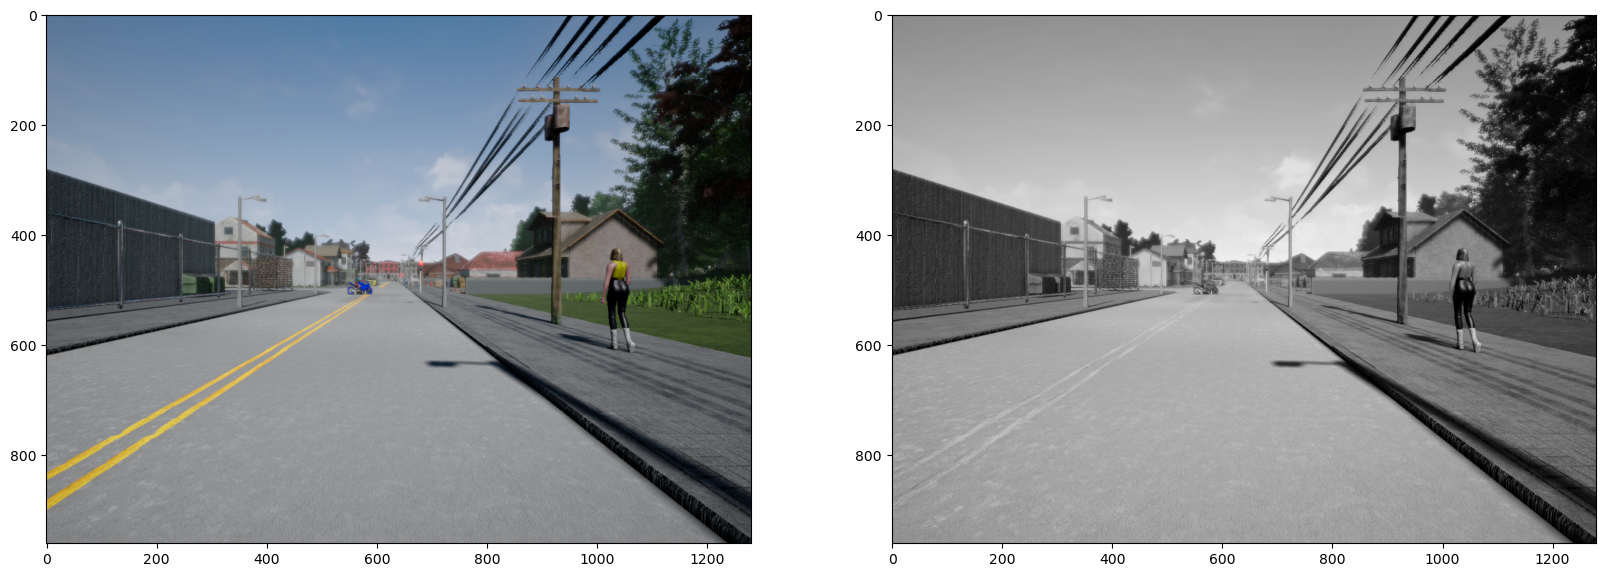

In [8]:
f = cv.imread("stereo_set/frame_00077_1547042741L.png")[..., ::-1]
f_gray = cv.cvtColor(f, cv.COLOR_BGR2GRAY)

_, ax = plt.subplots(1, 2, figsize=(20, 12))
ax[0].imshow(f)
ax[1].imshow(f_gray, cmap='gray')

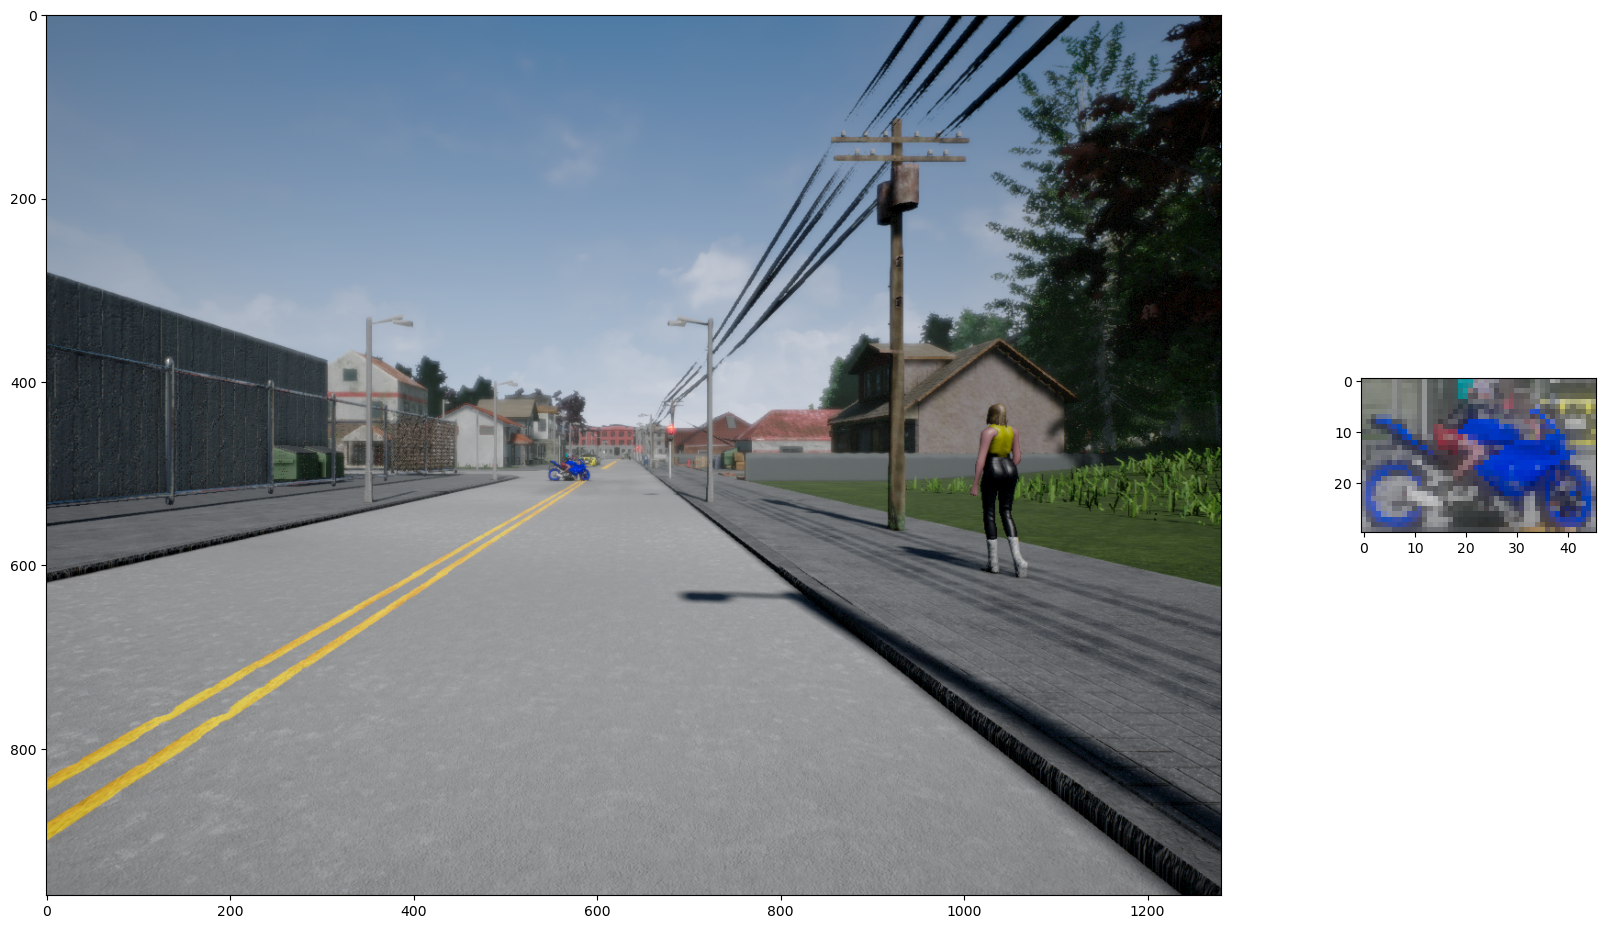

In [7]:
t = files_management.get_obstacle_image()
_, ax = plt.subplots(1, 2, figsize=(20, 12), width_ratios=[5, 1])
ax[0].imshow(f)
ax[1].imshow(t)

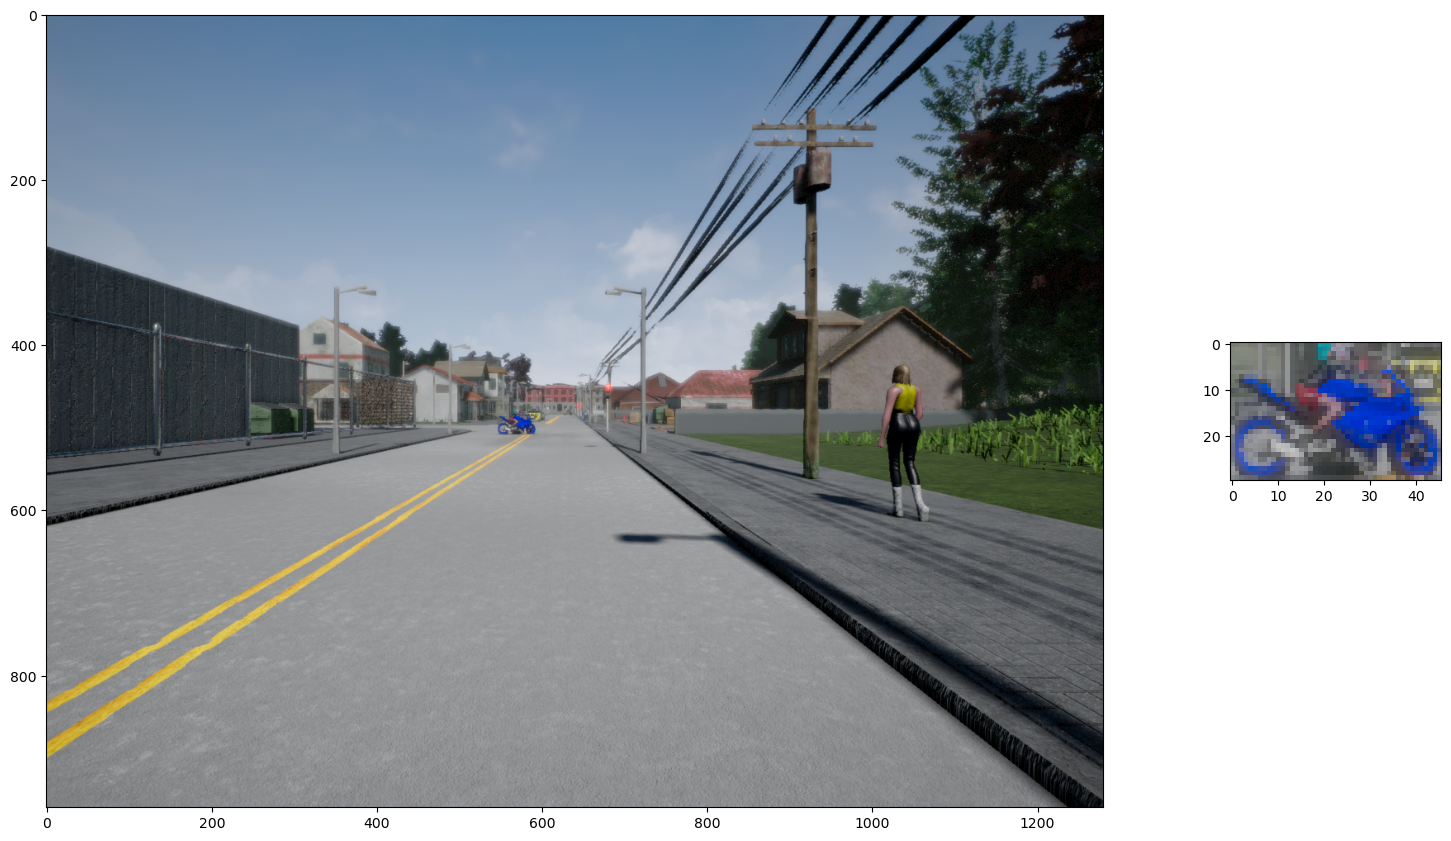

In [36]:
t = files_management.get_obstacle_image()

_, qlayout = plt.subplots(1, 2, figsize=(18, 18), width_ratios=[5, 1])
qlayout[0].imshow(f)
qlayout[1].imshow(t)
plt.show()

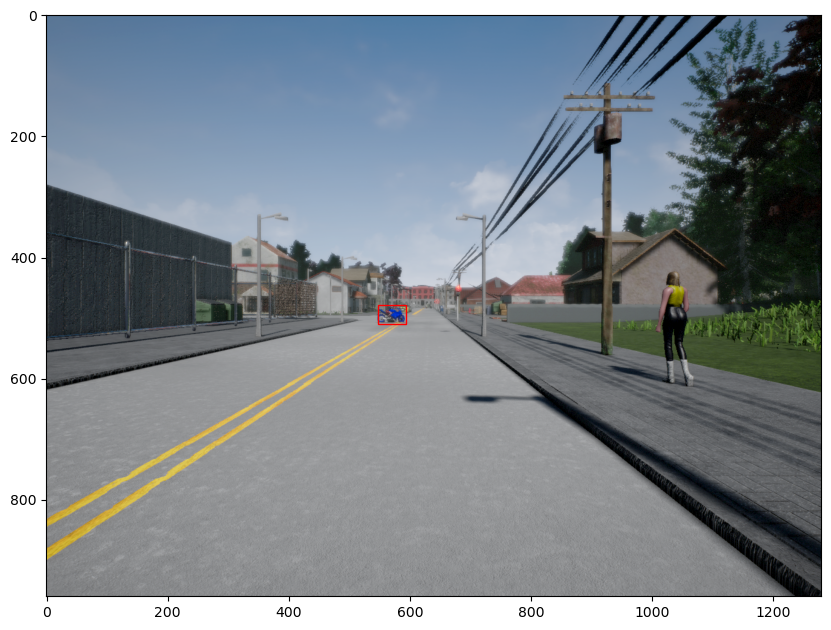

In [10]:
def match(f, t):
    
    # step 1: convert f, t to gray
    f_gray = cv.cvtColor(f, cv.COLOR_BGR2GRAY)    
    t_gray = cv.cvtColor(t, cv.COLOR_BGR2GRAY)

    h, w = t_gray.shape

    # step 2: 
    # compare 6 methods 
    # TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_SQDIFF, TM_SQDIFF_NORMED
    res = cv.matchTemplate(f_gray, t_gray, cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take min_loc
    return max_loc, w, h

top_left, w, h = match(f, t)
obox = patches.Rectangle(top_left, w, h, linewidth=1, edgecolor='r', facecolor='none')

_, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(f)
ax.add_patch(obox)
plt.show()